In [37]:
#Here you must specify your own path
root = ''

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
import sklearn.model_selection as model_selection
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

In [39]:
# Dic to get the respective target values of the numbers.
target_dic = {
    0: '(0, 20]constant',
    1: '(20, 40]constant',
    2: '(40, 60]constant',
    3: '(60, 80]constant',
    4: '(80, 100]constant',
    5: '(0, 20]intermittent',
    6: '(20, 40]intermittent',
    7: '(40, 60]intermittent',
    8: '(60, 80]intermittent',
    9: '(80, 100]intermittent',
}

In [40]:
df = pd.read_csv(root + 'data/02_processed/PreprocessedData.csv', sep=';')
df.set_index('user_id',inplace=True)

#split data into train and test data.
train, test = model_selection.train_test_split(df,test_size=0.2,stratify=df['target'],random_state=0)

#target of train data without encoding
target_train= train['target']

#delete target from training data
train.pop('target')

# target of train data without encoding
target_test= test['target']

#delete target from training data
test.pop('target')

#split train data into train and validation data
_train, validation_train, target_train, validation_target =model_selection.train_test_split(train, target_train,
                                                           test_size = .25,stratify=target_train,random_state=0)
print('_train'+str(_train.shape))
print('validation_train'+str(validation_train.shape))
print('target_train'+str(target_train.shape))
print('validation_target'+str(validation_target.shape))

#Numerical features between 0 and 1 on all parts of the data set are scaled with the parameters of the training data.
scaler = MinMaxScaler()
_train[['66','67','4']] = scaler.fit_transform(_train[['66','67','4']])
test[['66','67','4']]   = scaler.transform(test[['66','67','4']])
validation_train[['66','67','4']] = scaler.transform(validation_train[['66','67','4']])

#because the dataset is not balanced, 
#RandomOverSampler is applied. RandomOverSampler balances the dataset 
#by copying data points of underrepresented classes.
#x_train is the new train data
df2=df.copy()
df2.drop(['target','4','66','67'], axis = 1,inplace=True)
randomOverSampler  = RandomOverSampler(random_state=0)
x_train,target_train = randomOverSampler.fit_resample(pd.DataFrame(_train), target_train.to_numpy())



_train(1128, 30)
validation_train(376, 30)
target_train(1128,)
validation_target(376,)


<ipython-input-40-19da065282d8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _train[['66','67','4']] = scaler.fit_transform(_train[['66','67','4']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-40-19da065282d8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [41]:
x_train['target'] = target_train

validation_train['target']=validation_target

test['target']= target_test

<ipython-input-41-3d80d6fbc70b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_train['target']=validation_target
<ipython-input-41-3d80d6fbc70b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['target']= target_test


In [42]:
#Train Test and Validation Data is written into different CSV.
x_train.to_csv(root+"data/02_processed/train.csv",sep=';')
test.to_csv(root+"data/02_processed/test.csv",sep=';')
validation_train.to_csv(root+"data/02_processed/validation.csv",sep=';')

# Dummy Classifier

In [43]:
#A baseline classifier that makes random predictions. The other classifiers are measured against it.
dc = DummyClassifier(strategy="uniform",random_state=0)
target =x_train.pop('target')
target_test = test.pop('target')
dc.fit(x_train,target)

DummyClassifier(random_state=0, strategy='uniform')

In [44]:
predictions = dc.predict(test)

In [45]:
#Result of the baseline classifier measured with the f1-score.
f1_score(target_test,predictions,average='macro')

0.11166099623326169

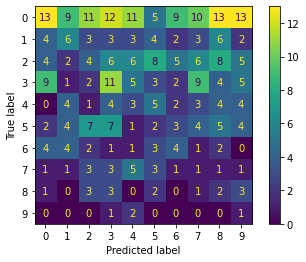

In [46]:
#A confusion matrix  of the predictions of the baseline classifier to see how it performs in detail.
c = confusion_matrix(target_test,predictions)
cm = ConfusionMatrixDisplay(c).plot()

In [47]:
#classification_report
target_names=['(0, 20]constant','(20, 40]constant','(40, 60]constant','(60, 80]constant','(80, 100]constant','(0, 20]intermittent','(20, 40]intermittent','(40, 60]intermittent','(60, 80]intermittent','(80, 100]intermittent',]
print(classification_report(target_test,predictions,digits=3,target_names=target_names,))

                       precision    recall  f1-score   support

      (0, 20]constant      0.342     0.123     0.181       106
     (20, 40]constant      0.194     0.167     0.179        36
     (40, 60]constant      0.111     0.074     0.089        54
     (60, 80]constant      0.216     0.216     0.216        51
    (80, 100]constant      0.081     0.100     0.090        30
  (0, 20]intermittent      0.057     0.051     0.054        39
 (20, 40]intermittent      0.143     0.182     0.160        22
 (40, 60]intermittent      0.026     0.050     0.034        20
 (60, 80]intermittent      0.044     0.133     0.067        15
(80, 100]intermittent      0.026     0.250     0.048         4

             accuracy                          0.125       377
            macro avg      0.124     0.135     0.112       377
         weighted avg      0.184     0.125     0.137       377



In [48]:
#Class weights for weighting classes or data points in classifiers
compute_class_weight(class_weight='balanced',classes=np.unique(df['target']),y=df['target'])

array([0.35625   , 1.05674157, 0.69409594, 0.74642857, 1.254     ,
       0.9746114 , 1.69459459, 1.881     , 2.475     , 8.55      ])